In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split, cross_validate

In [2]:
raw_data = pd.read_csv('/content/drive/MyDrive/Projects/Diabetes/Diabetes.csv')

In [3]:
raw_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Dataset information:

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.
Several constraints were placed on the selection of these instances from a larger database. 
In particular, all patients here are females at least 21 years old of Pima Indian heritage.


Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1)







#Cleaning the data

In [4]:
data = raw_data.copy()

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Observe that the min values for Glucose, BloodPressure, SkinThickness, Insulin, BMI are zero which is not possible.

Zero Counts of BP : (35, 9), BMI : (11, 9) , Insulin : (374, 9) , Glucose : (5, 9) , Skin : (227, 9)

##Null values

In [6]:
data.isnull().sum() #There are no null values in the data, but some coulmn values are 0, which are actually null values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
#If the data is skewed then median is a better choice since it is robust

glucose_median = np.median(data['Glucose'].sort_values())
data['Glucose'] = data['Glucose'].replace(0,glucose_median)

BloodPressure_median = np.median(data['BloodPressure'].sort_values())
data['BloodPressure'] = data['BloodPressure'].replace(0,BloodPressure_median)

Insulin_median = np.median(data['Insulin'].sort_values())
data['Insulin'] = data['Insulin'].replace(0,Insulin_median)

#Skintickness is 0 to 50
SkinThickness_median = np.median(data['SkinThickness'].sort_values())

data = data[data['SkinThickness'] < 51]
data['SkinThickness'] = data['SkinThickness'].replace(0,SkinThickness_median)

BMI_median = np.median(data['BMI'].sort_values())
data['BMI'] = data['BMI'].replace(0,BMI_median)


In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000
mean,3.865613,121.517787,72.329381,26.945982,94.908432,32.302108,0.468001,33.243742,0.347826
std,3.357010,30.319267,12.124119,8.418379,105.941142,6.727559,0.324267,11.758111,0.476595
min,0.000000,44.000000,24.000000,7.000000,15.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,23.000000,30.500000,27.500000,0.242000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.370000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,128.500000,36.400000,0.617000,41.000000,1.000000
max,17.000000,199.000000,122.000000,50.000000,846.000000,67.100000,2.329000,81.000000,1.000000


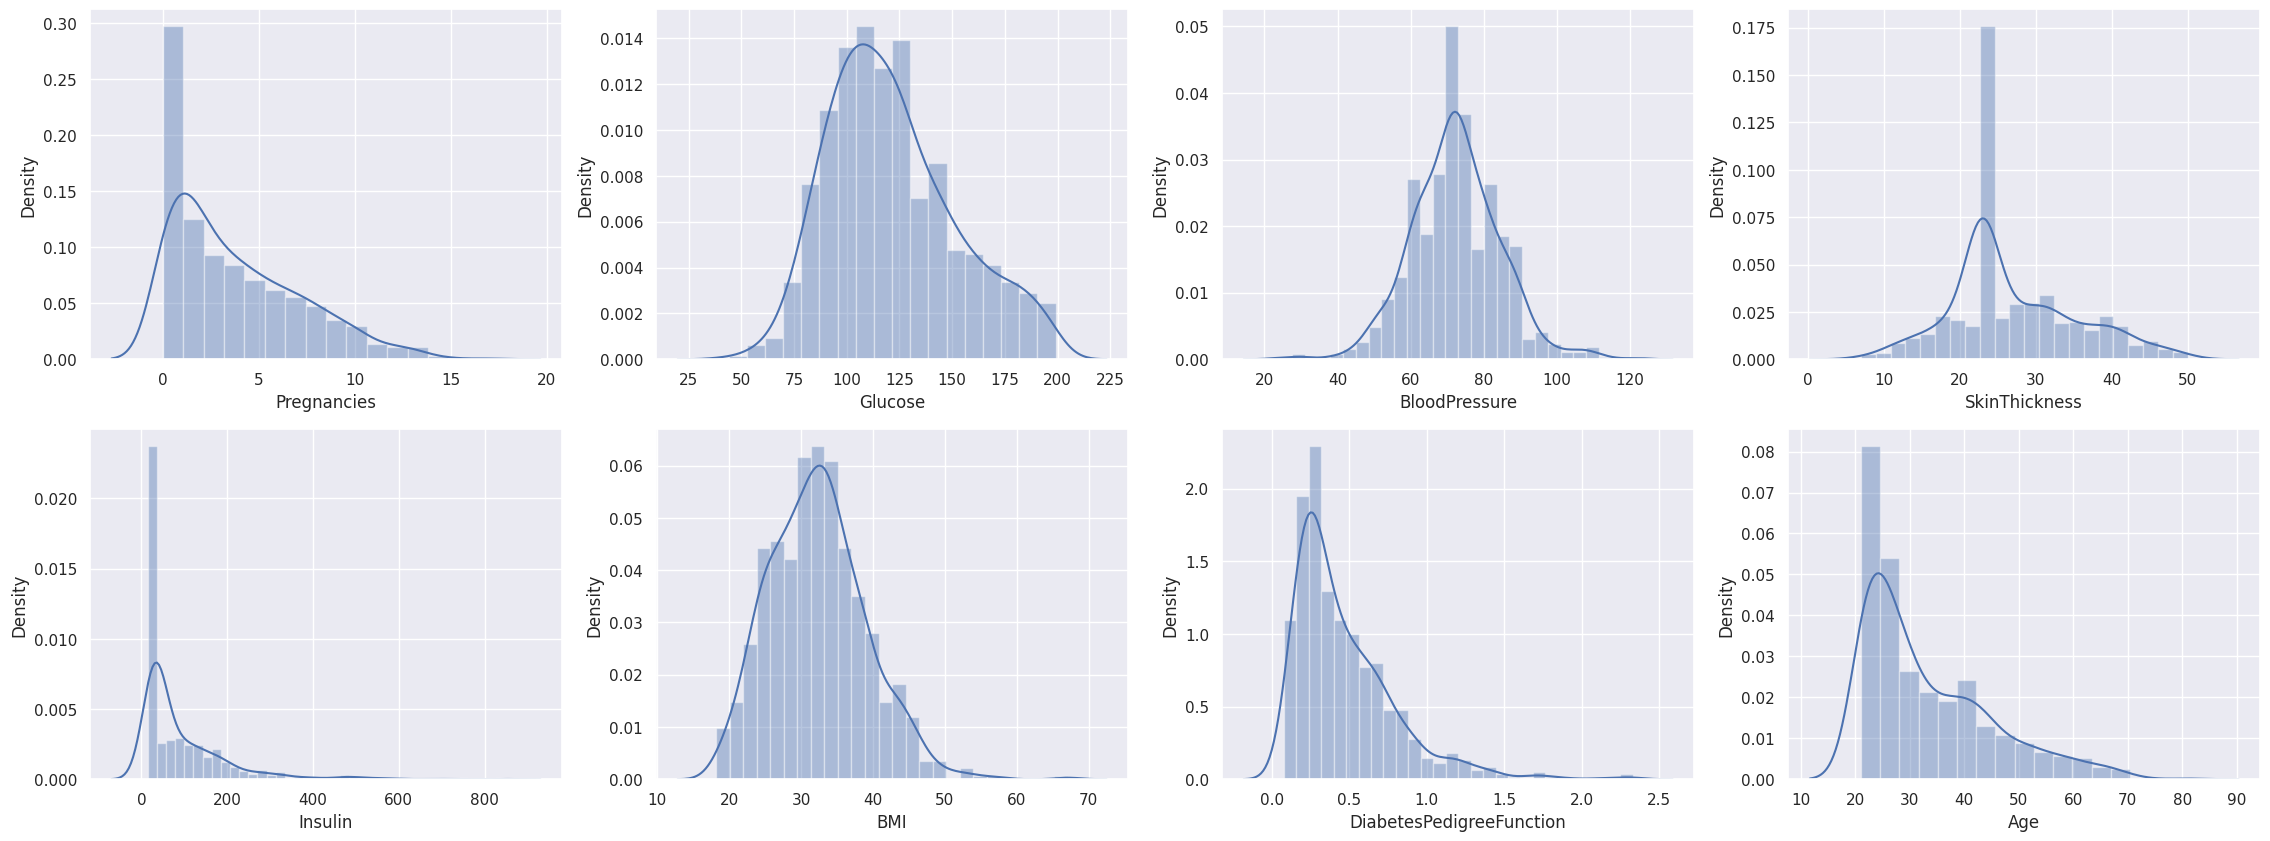

In [9]:
plt.figure(figsize=(28, 10))
plt.subplot(2,4,1)
sns.distplot(data['Pregnancies'])
plt.subplot(2,4,2)
sns.distplot(data['Glucose'])
plt.subplot(2,4,3)
sns.distplot(data['BloodPressure'])
plt.subplot(2,4,4)
sns.distplot(data['SkinThickness'])
plt.subplot(2,4,5)
sns.distplot(data['Insulin'])
plt.subplot(2,4,6)
sns.distplot(data['BMI'])
plt.subplot(2,4,7)
sns.distplot(data['DiabetesPedigreeFunction'])
plt.subplot(2,4,8)
sns.distplot(data['Age'])
plt.show()

In [10]:
data_no0 = data.copy()

##Outliers

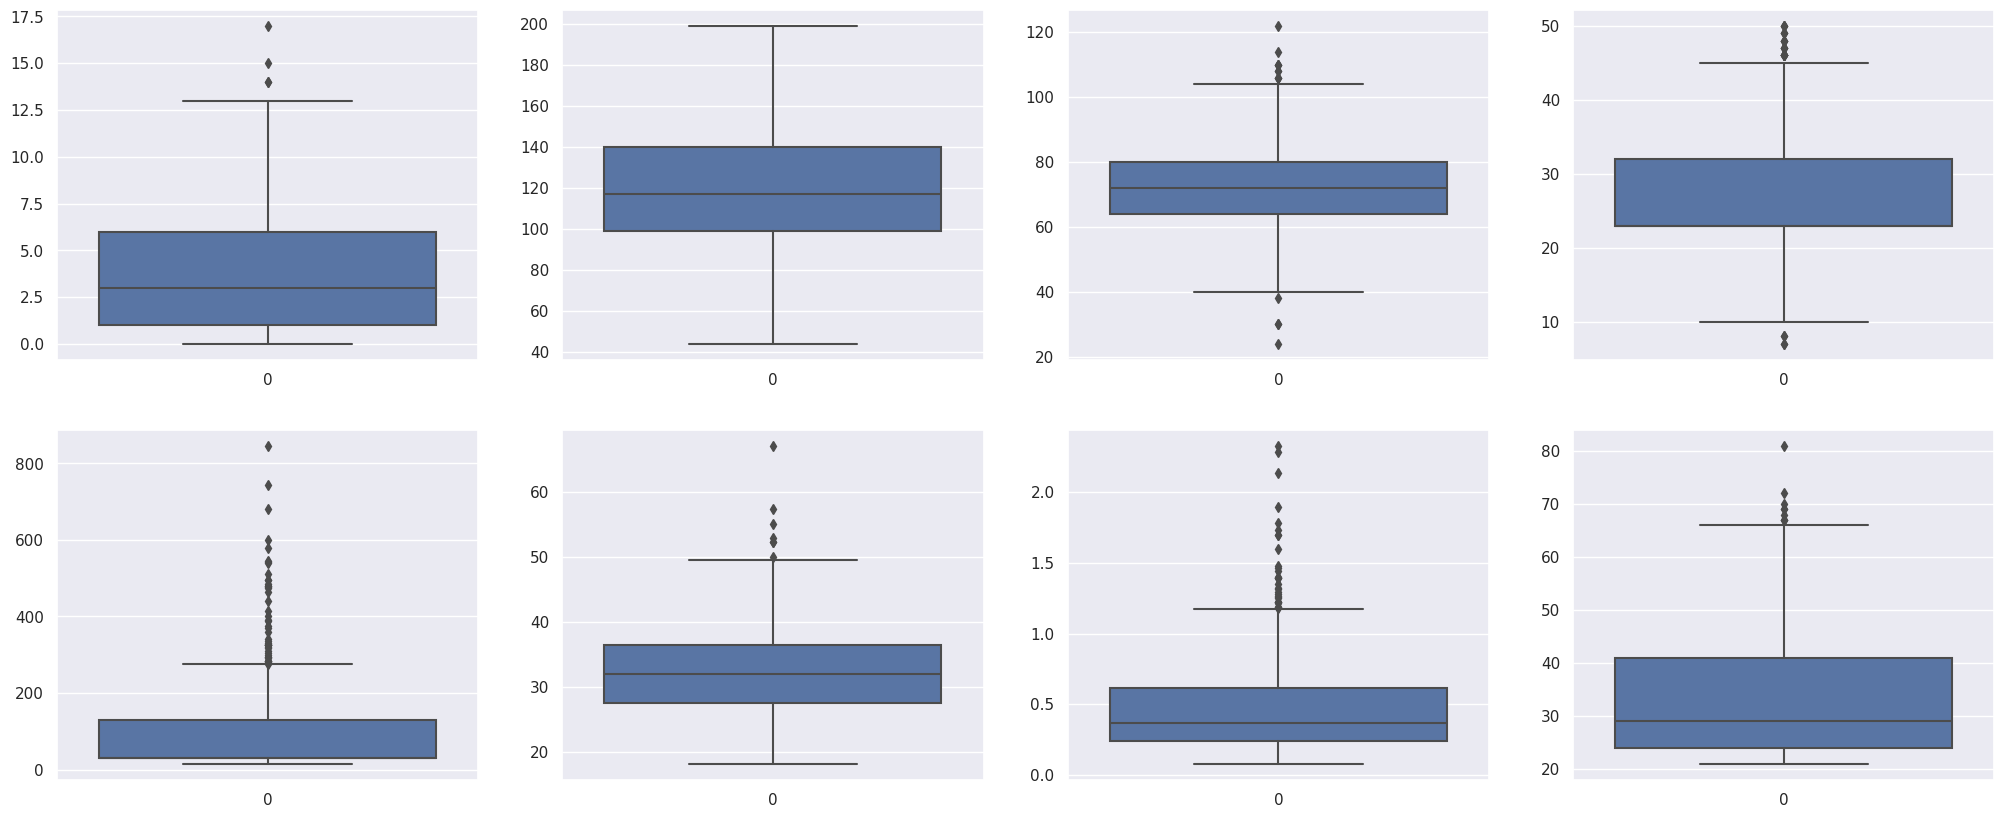

In [11]:
#Boxplots to detect outliers:
plt.figure(figsize=(25, 10))
plt.subplot(2,4,1)
sns.boxplot(data_no0['Pregnancies'])
plt.subplot(2,4,2)
sns.boxplot(data_no0['Glucose'])
plt.subplot(2,4,3)
sns.boxplot(data_no0['BloodPressure'])
plt.subplot(2,4,4)
sns.boxplot(data_no0['SkinThickness'])
plt.subplot(2,4,5)
sns.boxplot(data_no0['Insulin'])
plt.subplot(2,4,6)
sns.boxplot(data_no0['BMI'])
plt.subplot(2,4,7)
sns.boxplot(data_no0['DiabetesPedigreeFunction'])
plt.subplot(2,4,8)
sns.boxplot(data_no0['Age'])
plt.show()

In [12]:
#BMI and Insulin
#Remove observations above the upper outer fence for Insulin and DPFunction
Q1_Insulin = np.percentile(data_no0['Insulin'], 25, interpolation = 'midpoint')
Q3_Insulin = np.percentile(data_no0['Insulin'], 75, interpolation = 'midpoint')
IQR_Insulin = Q3_Insulin - Q1_Insulin
UOF_Insulin = Q3_Insulin + 3*IQR_Insulin

data_no0 = data_no0[data_no0['Insulin'] < UOF_Insulin]

Q1_DiabetesPedigreeFunction = np.percentile(data_no0['DiabetesPedigreeFunction'], 25, interpolation = 'midpoint')
Q3_DiabetesPedigreeFunction = np.percentile(data_no0['DiabetesPedigreeFunction'], 75, interpolation = 'midpoint')
IQR_DiabetesPedigreeFunction = Q3_DiabetesPedigreeFunction - Q1_DiabetesPedigreeFunction
UOF_DiabetesPedigreeFunction = Q3_DiabetesPedigreeFunction + 3*IQR_DiabetesPedigreeFunction

data_no0 = data_no0[data_no0['DiabetesPedigreeFunction'] < UOF_DiabetesPedigreeFunction]

#Remove all above 50 for BMI
data_no0 = data_no0[data_no0['BMI'] < 51]

#Remove all above 70 for Age
data_no0 = data_no0[data_no0['Age'] < 71]

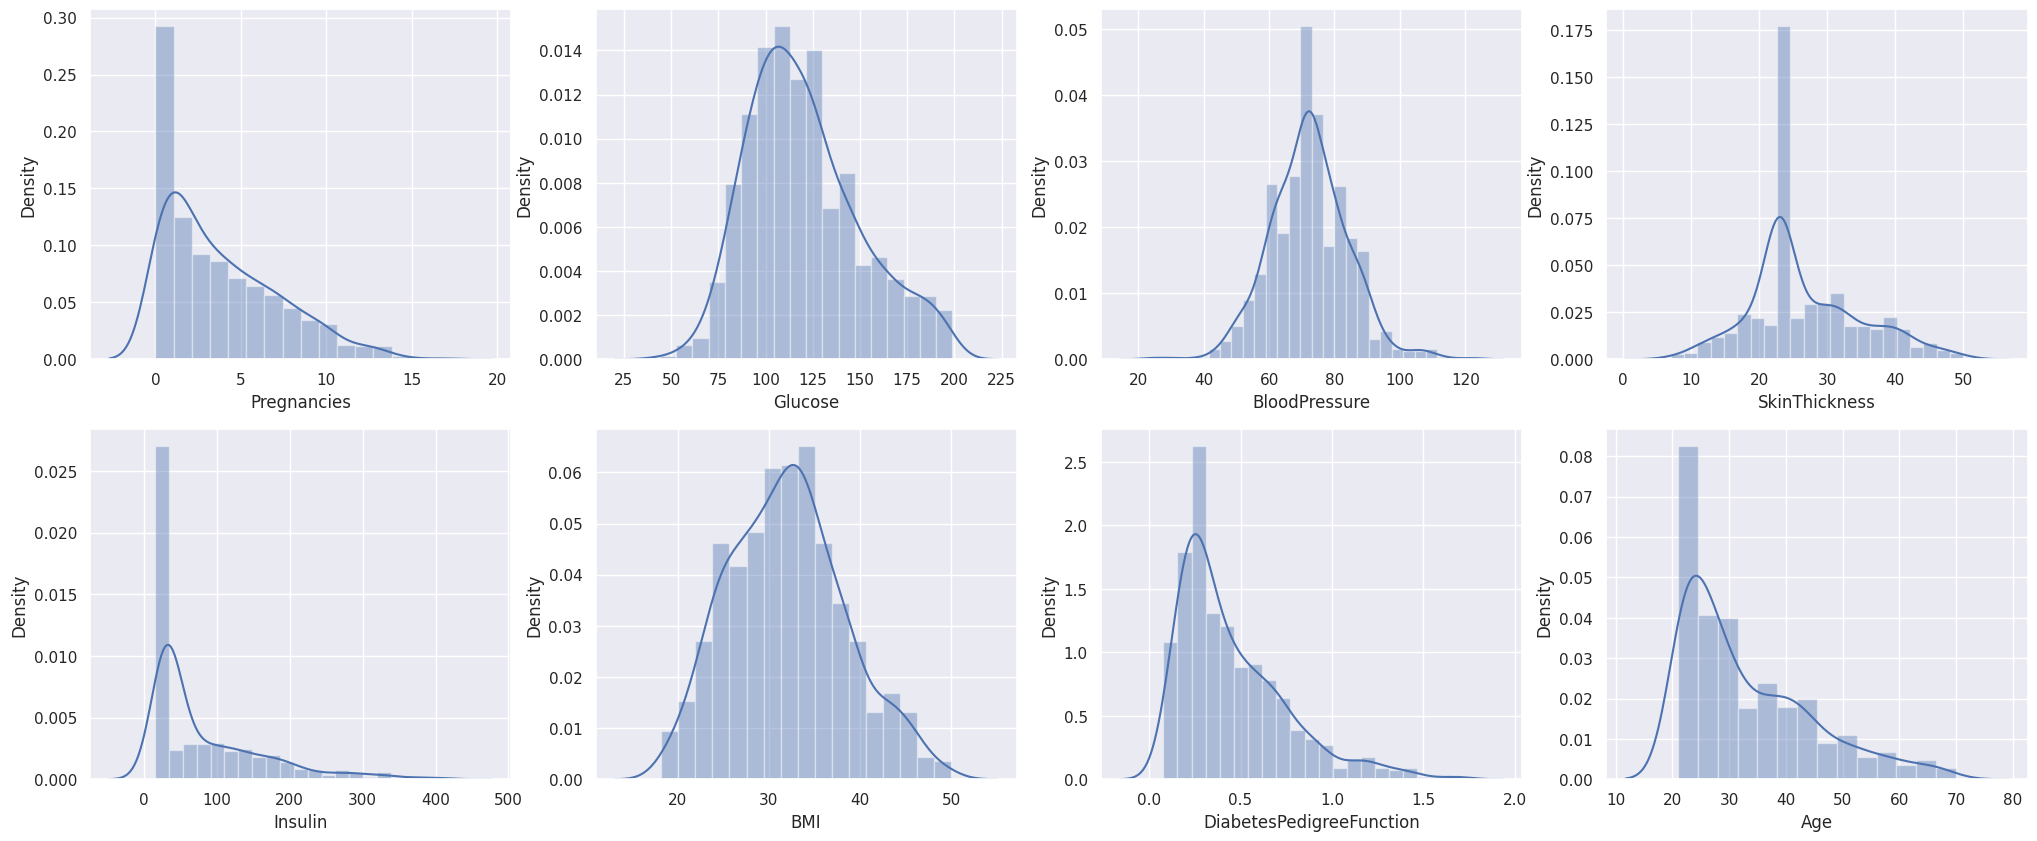

In [13]:
plt.figure(figsize=(25, 10))
plt.subplot(2,4,1)
sns.distplot(data_no0['Pregnancies'])
plt.subplot(2,4,2)
sns.distplot(data_no0['Glucose'])
plt.subplot(2,4,3)
sns.distplot(data_no0['BloodPressure'])
plt.subplot(2,4,4)
sns.distplot(data_no0['SkinThickness'])
plt.subplot(2,4,5)
sns.distplot(data_no0['Insulin'])
plt.subplot(2,4,6)
sns.distplot(data_no0['BMI'])
plt.subplot(2,4,7)
sns.distplot(data_no0['DiabetesPedigreeFunction'])
plt.subplot(2,4,8)
sns.distplot(data_no0['Age'])
plt.show()

In [14]:
data_noO = data_no0.copy()

##Multicollinearity using heatmap

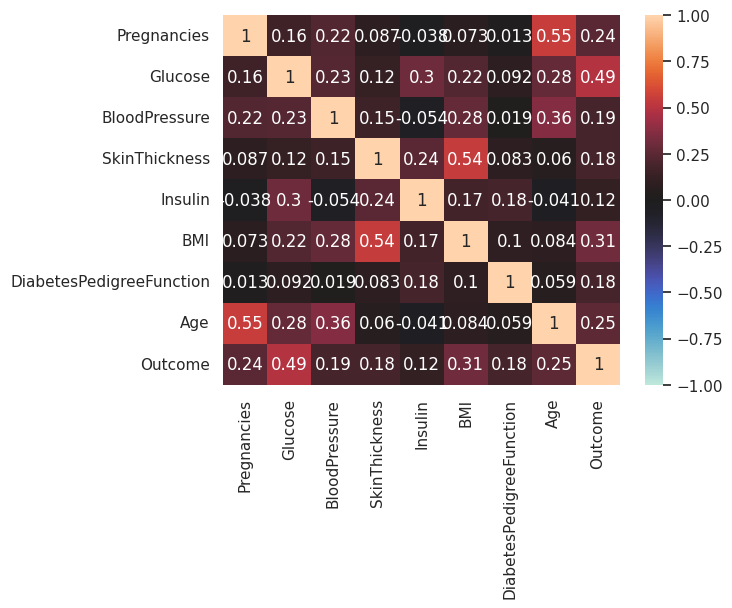

In [15]:
sns.heatmap(data_noO.corr(), annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
plt.show()

In [16]:
data_cleaned = data_noO.copy()

The correlation values are not high for any pair of inputs, indicating no significant multicollinearity.

##Dependent variable

In [17]:
#Outcome is the only categorical variable here
Outcomedf = pd.DataFrame(data_cleaned['Outcome'].value_counts())
Outcomedf

,Outcome
0,484
1,246


In [18]:
Outcomedf.index

Int64Index([0, 1], dtype='int64')

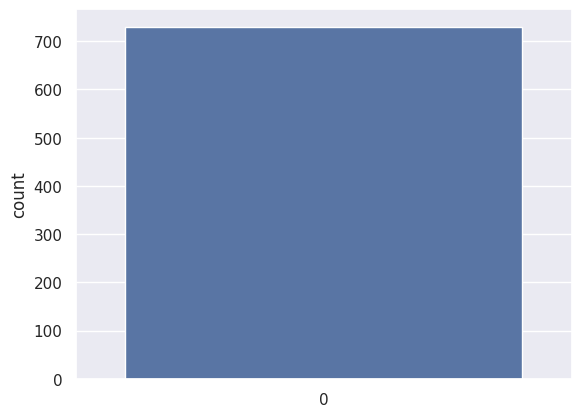

In [19]:
sns.countplot(data_cleaned['Outcome'])
plt.show()

In [20]:
#sns.pairplot(data_cleaned)

In [21]:
data_cleaned.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
5,5,116,74,23,30.5,25.6,0.201,30,0


#Modelling the data

In [22]:
data_m = data_cleaned.copy()

##Statsmodel learning model

Model on the full data

In [23]:
import statsmodels.api as sm

X = data_m.drop(['Outcome'], axis = 1)
y = data_m['Outcome']

In [24]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
5,5,116,74,23,30.5,25.6,0.201,30


In [25]:
y.head()

0    1
1    0
2    1
3    0
5    0
Name: Outcome, dtype: int64

In [26]:
X_constant = sm.add_constant(X)

In [27]:
# building the model and fitting the data
log_reg = sm.Logit(y, X_constant).fit()

Optimization terminated successfully.
         Current function value: 0.452495
         Iterations 6


In [28]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  730
Model:                          Logit   Df Residuals:                      721
Method:                           MLE   Df Model:                            8
Date:                Wed, 05 Apr 2023   Pseudo R-squ.:                  0.2919
Time:                        06:24:51   Log-Likelihood:                -330.32
converged:                       True   LL-Null:                       -466.48
Covariance Type:            nonrobust   LLR p-value:                 3.160e-54
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -9.8053      0.888    -11.039      0.000     -11.546      -8.064
Pregnancies                  0.1215      0.034      3.579      0.000       0.055       0.



*   The McFadden’s pseudo-R-squared is used for comparing variations of the same
model. Favorable range [0.2,0.4].
*   Log-Likelihood* (the log of the
likelihood function). Always negative.
We aim for this to be as high as
possible. 

*   Log-Likelihood-Null is the loglikelihood of a model which has no
independent variables. It is used as
the benchmark ‘worst’ model.
*   LLog-Likelihood Ratio p-value
measures of our model is statistically
different from the benchmark ‘worst’
model.


*   The p-values for the variables SkinThickness, BP, Age are significantly high. But since all variables are important in our model, we will not perform variable selection. 



##Sklearn Model

In [29]:
data_m.shape

(730, 9)

In [30]:
y = data_m["Outcome"]
X = data_m.drop(["Outcome"], axis=1)

In [31]:
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [32]:
x_train = x_train.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)

In [33]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,117,74,20,23.0,27.7,0.299,21
1,0,105,68,22,30.5,20.0,0.236,22
2,1,83,68,23,30.5,18.2,0.624,27
3,6,144,72,27,228.0,33.9,0.255,40
4,0,101,64,17,30.5,21.0,0.252,21


In [34]:
log_model = LogisticRegression().fit(x_train, y_train)

In [35]:
y_pred = log_model.predict(x_test) #Predicted values of the test set

In [36]:
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [37]:
y_prob = log_model.predict_proba(x_test) 
#A (146,2) shape numpy array where the first column is the prob of getting 0 as outcome and second column of getting 1.

##Performance of the model

###Confusion matrix

Confusion matrix is a performance measurement for machine learning classification problem where output can be two or more classes. It is a matrix with 4 different combinations of predicted and actual values.

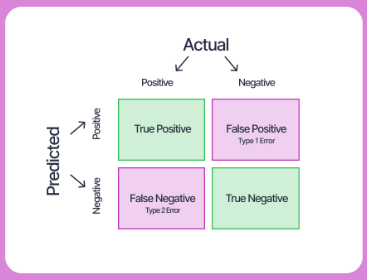

In [38]:
print(confusion_matrix(y_test,y_pred))

[[88 15]
 [19 24]]


Confusion matrix is useful for measuring Recall, Precision, Specificity, Accuracy, and most importantly AUC-ROC curves.

###ROC, AUC

The terms used in ROC, AUC are:

*   TPR (True Positive Rate) / Recall /Sensitivity:
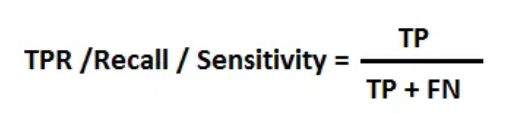

*   Specificity:
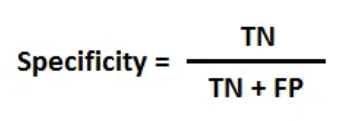



*   FPR:
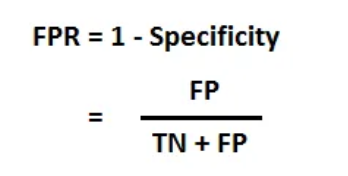




In [39]:
y_prob_positive = log_model.predict_proba(x_test)[:, 1]
#This gives a 1 value numpy array with prob values of the outcome being 1

In [40]:
#roc_curve(y_test, y_prob_positive)
fpr, tpr, thresholds = roc_curve(y_test, y_prob_positive)
fpr

array([0.        , 0.00970874, 0.00970874, 0.01941748, 0.01941748,
       0.02912621, 0.02912621, 0.03883495, 0.03883495, 0.04854369,
       0.04854369, 0.06796117, 0.06796117, 0.10679612, 0.10679612,
       0.14563107, 0.14563107, 0.19417476, 0.19417476, 0.2038835 ,
       0.2038835 , 0.24271845, 0.24271845, 0.27184466, 0.27184466,
       0.2815534 , 0.2815534 , 0.31067961, 0.31067961, 0.32038835,
       0.32038835, 0.33980583, 0.33980583, 0.40776699, 0.40776699,
       0.41747573, 0.41747573, 0.67961165, 0.67961165, 0.7961165 ,
       0.7961165 , 0.9223301 , 0.9223301 , 1.        ])

In [41]:
#AUC
roc_auc_score(y_test, y_prob_positive)

0.8049221043124859

In [42]:
roc_auc = auc(fpr, tpr)

###Plotting the ROC curve

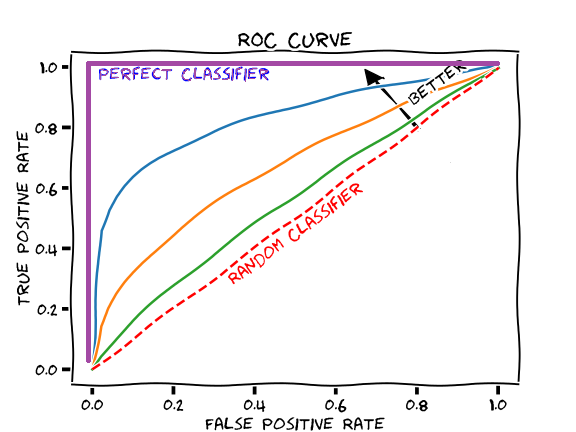

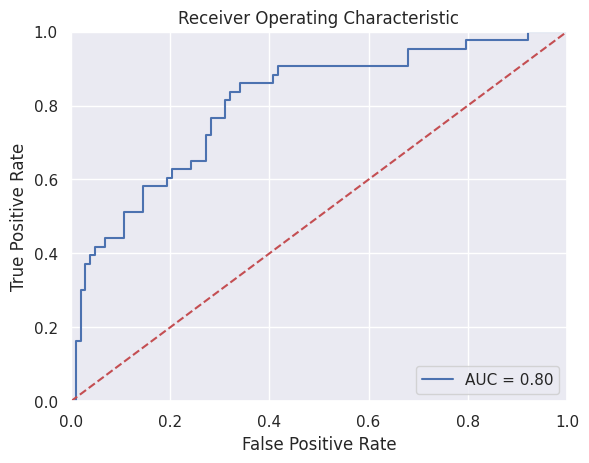

In [43]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Checking assumptions for Logistic Regression Model:






1.   Appropriate Outcome Type
2.   Linearity of independent variables and log-odds
3.   No strongly influential outliers
4.   Absence of Multicollinearity
5.   Independence of observations
6.   Sufficiently large sample size


##Assumption of Linearity in Logit for each continous covariate.

The relationship between the logit (log odds) of the outcome and each continous variable is linear.

In [45]:
list(data_m.columns)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [46]:
# Define continuous variables
continuous_var = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age' ]

In [47]:
y_prob_positive_train = log_model.predict_proba(x_train)[:, 1]

log_odds = np.log(y_prob_positive_train / (1 - y_prob_positive_train)) 


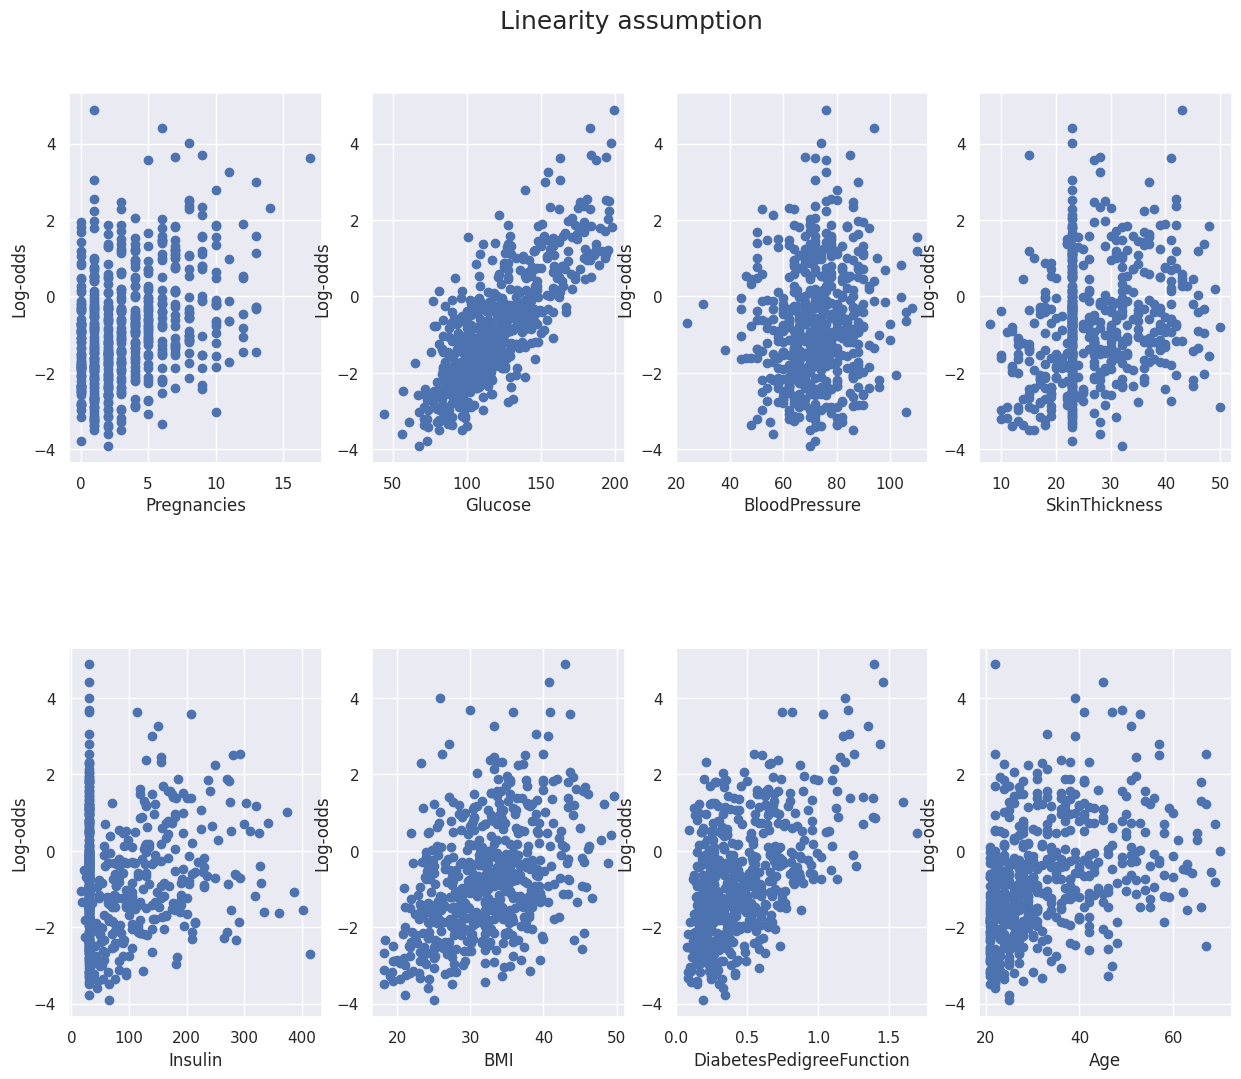

In [48]:
#Visualize predictor variable vs Logit values for continous variables
i = list(range(1,9))

plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Linearity assumption", fontsize=18, y=0.95)

for cont_var, k in zip(continuous_var, i):
  ax = plt.subplot(2, 4, k)
  ax.scatter(x=x_train[cont_var].values, y=log_odds)
  ax.set_xlabel(cont_var)
  ax.set_ylabel("Log-odds")
  
plt.show()

### Formal test for Linearity: Box-Tidwell test

The Box-Tidwell test is used to check for linearity between the predictors and the
logit. This is done by adding log-transformed interaction terms between the
continuous independent variables and their corresponding natural log into the
model.

In [49]:
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families

In [50]:
data_linear = data_m.copy()

In [51]:
# Add logit transform interaction terms (natural log) for continuous variables e.g.. Age *Log(Age)
for var in continuous_var:
  data_linear[f'{var}:Log_{var}'] = data_linear[var].apply(lambda x: x * np.log(x))


In [52]:
data_linear.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies:Log_Pregnancies,Glucose:Log_Glucose,BloodPressure:Log_BloodPressure,SkinThickness:Log_SkinThickness,Insulin:Log_Insulin,BMI:Log_BMI,DiabetesPedigreeFunction:Log_DiabetesPedigreeFunction,Age:Log_Age
0,6,148,72,35,30.5,33.6,0.627,50,1,10.750557,739.587417,307.919961,124.437182,104.240664,118.088076,-0.292689,195.601150
1,1,85,66,29,30.5,26.6,0.351,31,0,0.000000,377.625357,276.517213,97.651579,104.240664,87.272238,-0.367486,106.453603
2,8,183,64,23,30.5,23.3,0.672,32,1,16.635532,953.335966,266.168517,72.116367,104.240664,73.358963,-0.267118,110.903549
3,1,89,66,23,94.0,28.1,0.167,21,0,0.000000,399.488637,276.517213,72.116367,427.069710,93.735125,-0.298890,63.934971
5,5,116,74,23,30.5,25.6,0.201,30,0,8.047190,551.416462,318.500817,72.116367,104.240664,83.010364,-0.322495,102.035921


In [53]:
data_linear.isna().sum() #These null values exist since, log(1) = 0. And there are 99 rows with number of pregnancies 1. So we replace the null with 0.

Pregnancies                                               0
Glucose                                                   0
BloodPressure                                             0
SkinThickness                                             0
Insulin                                                   0
BMI                                                       0
DiabetesPedigreeFunction                                  0
Age                                                       0
Outcome                                                   0
Pregnancies:Log_Pregnancies                              99
Glucose:Log_Glucose                                       0
BloodPressure:Log_BloodPressure                           0
SkinThickness:Log_SkinThickness                           0
Insulin:Log_Insulin                                       0
BMI:Log_BMI                                               0
DiabetesPedigreeFunction:Log_DiabetesPedigreeFunction     0
Age:Log_Age                             

In [54]:
data_linear["Pregnancies:Log_Pregnancies"].fillna(0, inplace = True)

In [55]:
data_linear.isna().sum() #now we have no null values!

Pregnancies                                              0
Glucose                                                  0
BloodPressure                                            0
SkinThickness                                            0
Insulin                                                  0
BMI                                                      0
DiabetesPedigreeFunction                                 0
Age                                                      0
Outcome                                                  0
Pregnancies:Log_Pregnancies                              0
Glucose:Log_Glucose                                      0
BloodPressure:Log_BloodPressure                          0
SkinThickness:Log_SkinThickness                          0
Insulin:Log_Insulin                                      0
BMI:Log_BMI                                              0
DiabetesPedigreeFunction:Log_DiabetesPedigreeFunction    0
Age:Log_Age                                             

In [56]:
# Keep columns related to continuous variables
cols_to_keep = continuous_var + data_linear.columns.tolist()[-len(continuous_var):]

# Redefining variables to include interaction terms
X_lt = data_linear[cols_to_keep]

# Add constant term
X_lt_constant = sm.add_constant(X_lt, prepend=False)

In [57]:
y = data_linear['Outcome']

In [58]:
# Building model and fit the data (using statsmodel's Logit)
logit_results = GLM(y, X_lt_constant, family=families.Binomial()).fit()

# Display summary results
print(logit_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                Outcome   No. Observations:                  730
Model:                            GLM   Df Residuals:                      713
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -310.09
Date:                Wed, 05 Apr 2023   Deviance:                       620.17
Time:                        06:25:11   Pearson chi2:                     686.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3485
Covariance Type:            nonrobust                                         
                                                            coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------

We need to check the statistical significance of the interaction terms based on their p-values. A statistically significant variable (i.e., p≤0.05), indicates the presence of non-linearity.

Here, Age and BMI have p-value < 0.05, indicating non-linearity between the logit of the outcome and the variable.

##No strongly influential outliers

Logistic regression assumes that there are no highly influential outlier data points,
as they distort the outcome and accuracy of the model.

We can use Cook’s Distance to determine the influence of a data point, and it is
calculated based on its residual and leverage. It summarizes the changes in the
regression model when that particular (ith) observation is removed.


In [59]:
import statsmodels.stats.tests.test_influence

In [60]:
#We fit the GLM model since it has an inbuilt method for finding cook's distance
# Add constant term
x_train_const = sm.add_constant(x_train, prepend=False)

# Building model and fit the data (using statsmodel's Logit)
logit_results = GLM(y_train, x_train_const, family=families.Binomial()).fit()

In [61]:
print(logit_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                Outcome   No. Observations:                  584
Model:                            GLM   Df Residuals:                      575
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -263.39
Date:                Wed, 05 Apr 2023   Deviance:                       526.78
Time:                        06:25:11   Pearson chi2:                     574.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3229
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies             

In [62]:
#create instance of influence
influence = logit_results.get_influence()

#obtain Cook's distance for each observation
cooks = influence.cooks_distance

#display Cook's distances
#print(cooks)

In [63]:
summ_df = influence.summary_frame()
summ_df.sort_values("cooks_d", ascending=False)[:10]

,dfb_Pregnancies,dfb_Glucose,dfb_BloodPressure,dfb_SkinThickness,dfb_Insulin,dfb_BMI,dfb_DiabetesPedigreeFunction,dfb_Age,dfb_const,cooks_d,standard_resid,hat_diag,dffits_internal
157,-0.061903,-0.299834,-0.075161,0.129458,0.196692,-0.189310,-0.429025,0.006401,0.362228,0.036633,-8.216648,0.004860,-0.574192
397,-0.332303,-0.142397,-0.051523,-0.029108,0.036042,-0.102724,-0.273157,0.144941,0.239221,0.025145,-4.251217,0.012367,-0.475713
48,0.020031,-0.241749,-0.294316,-0.111136,0.152648,0.175320,-0.107825,0.125291,0.218731,0.023034,-2.435803,0.033760,-0.455304
544,-0.104545,-0.078611,0.003402,0.013991,0.103626,0.051393,-0.353973,-0.082620,0.088773,0.020128,-2.356341,0.031595,-0.425619
171,0.015450,-0.265414,0.053913,-0.027605,0.127941,0.064129,-0.091789,-0.190956,0.142880,0.019406,-4.046742,0.010553,-0.417915
18,-0.268930,-0.121277,0.059503,-0.015088,0.000929,-0.074422,0.080203,0.295547,0.007715,0.016755,2.032806,0.035207,0.388321
414,-0.218778,-0.259731,0.102301,0.050293,0.131683,-0.109969,0.033981,0.113234,0.089699,0.015411,-3.193386,0.013418,-0.372422
178,0.018934,-0.131470,0.102358,0.130676,-0.213752,0.022039,-0.020892,0.013584,-0.056661,0.015138,-1.366448,0.068007,-0.369116
148,-0.049733,-0.033712,0.039190,0.092705,0.274929,-0.160635,-0.105100,-0.000230,0.067017,0.014737,2.053791,0.030486,0.364191
459,0.199114,-0.083002,0.178602,-0.051463,0.059283,0.074708,0.030610,-0.259517,-0.066581,0.014295,-1.189808,0.083308,-0.358680


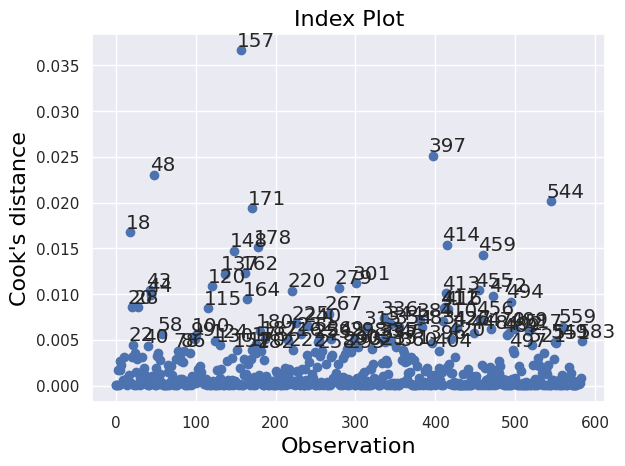

In [64]:
fig = influence.plot_index(y_var="cooks", threshold=2 * cooks[0].mean())
fig.tight_layout(pad=1.0)

###DFBETAS

The DFBETAS are statistics that indicate the effect that deleting each observation has on the estimates for the regression coefficients.

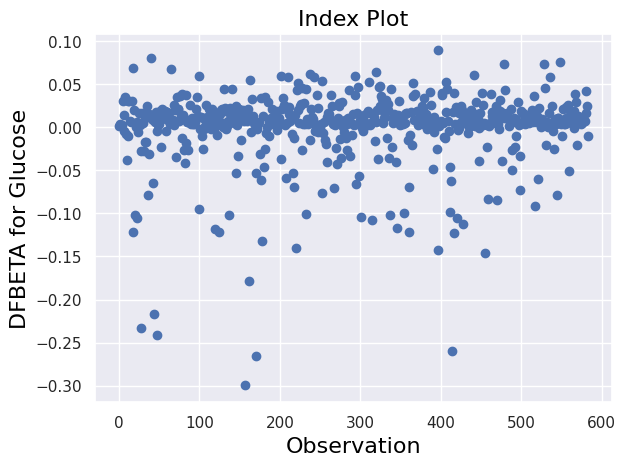

In [65]:
fig = influence.plot_index(y_var="dfbeta", idx=1, threshold=0.5)
fig.tight_layout(pad=1.0)

In [66]:
influence_df = summ_df[['cooks_d']]
influence_df.sort_values("cooks_d", ascending=False).head()

,cooks_d
157,0.036633
397,0.025145
48,0.023034
544,0.020128
171,0.019406


The above are the top 5 most influential observartions.

##Absence of Multicollinearity

Multicollinearity corresponds to a situation where the data contain highly
correlated independent variables. This is a problem because it reduces the
precision of the estimated coefficients, which weakens the statistical power of the
logistic regression model.

Variance Inflation Factor (VIF) measures the degree of multicollinearity in a set of
independent variables.

Mathematically, it is equal to the ratio of the overall model variance to the variance
of a model that includes only that single independent variable.

The smallest possible value for VIF is 1 (i.e., a complete absence of collinearity). As
a rule of thumb, a VIF value that exceeds 5 or 10 indicates a problematic amount of
multicollinearity.

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = data_m.drop('Outcome', axis = 1)

variables = X

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif.index = variables.columns

In [68]:
vif

,VIF
Pregnancies,3.374082
Glucose,20.542117
BloodPressure,34.291046
SkinThickness,16.628258
Insulin,2.641593
BMI,36.734951
DiabetesPedigreeFunction,3.487775
Age,15.183537


Heatmap showed no significant multicollinearity but the high VIF values indicate that it does exist. This is because collinearity can exist between three or more variables even if no pair of variables is seen to have an exceptionally high correlation. Hence, VIF is a better way to assess multicollinearity.

To remedy multicollinearity, we can use techniques like PCA, ridge regression. 

##Independence of observations

The observations must be independent of each other, i.e., they should not come
from repeated or paired data. This means that each observation is not influenced by or related to the rest of the observations.

This assumption would be more of a concern when dealing with time-series data,
where the correlation between sequential observations (auto-correlation) can be an
issue.

In case of non-time series data, the ‘time variable’ is the order of observations (i.e., index numbers).

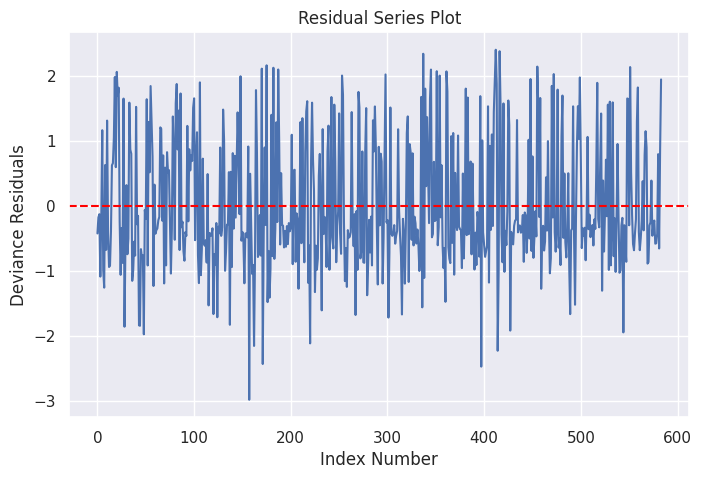

In [69]:
import scipy.stats as stats

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, title="Residual Series Plot", xlabel="Index Number", ylabel="Deviance Residuals")

# Generate residual series plot using standardized deviance residuals
ax.plot(x_train.index.tolist(), stats.zscore(logit_results.resid_deviance))

# Draw horizontal line at y=0
plt.axhline(y = 0, ls="--", color='red');


Since the residuals in the plot above appear to be randomly scattered around the
centerline of zero, we can infer (visually) that the assumption is satisfied.

Thus, we fit a Logistic Regression model to the Diabetes dataset, checked the model's performance and performed Model diagnostics.

#Modelling the data using LDA and QDA

In [70]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [71]:
y = data_m["Outcome"]
X = data_m.drop(["Outcome"], axis=1)

In [72]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=24)

In [73]:
lda = LinearDiscriminantAnalysis()

lda.fit(x_train, y_train)
y_pred = lda.predict(x_train)

In [74]:
qda = QuadraticDiscriminantAnalysis()

qda.fit(x_train,y_train)
y_pred_qda = qda.predict(x_train)

##Model evaluation

In [75]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc

print(classification_report(y_train, y_pred))
print(classification_report(y_train, y_pred_qda))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       433
           1       0.73      0.56      0.63       224

    accuracy                           0.78       657
   macro avg       0.76      0.73      0.74       657
weighted avg       0.77      0.78      0.77       657

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       433
           1       0.71      0.62      0.66       224

    accuracy                           0.78       657
   macro avg       0.76      0.74      0.75       657
weighted avg       0.78      0.78      0.78       657



The accuracy for both the models is 0.78. Precision is slightly higher for QDA (0.82) compared to LDA (0.80).

In [76]:
print(confusion_matrix(y_train,y_pred)) #For LDA

[[386  47]
 [ 98 126]]


In [77]:
print(confusion_matrix(y_train,y_pred_qda)) #For QDA

[[376  57]
 [ 85 139]]


###Cross Validation

In [78]:
cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=3, random_state=24)

#evaluate model
scores = cross_val_score(lda, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))

0.7772411616161617


In [79]:
cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=3, random_state=24)

#evaluate model
scores = cross_val_score(qda, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores)) 

0.7589962121212123


The average accuracy for cross validation in LDA and QDA is 0.78 and 0.76 respectively.

###Prediction

In [80]:
y_test_pred = lda.predict(x_test)
y_test_pred_qda = qda.predict(x_test)

In [81]:
print(classification_report(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred_qda))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        51
           1       0.65      0.59      0.62        22

    accuracy                           0.78        73
   macro avg       0.74      0.73      0.73        73
weighted avg       0.78      0.78      0.78        73

              precision    recall  f1-score   support

           0       0.85      0.86      0.85        51
           1       0.67      0.64      0.65        22

    accuracy                           0.79        73
   macro avg       0.76      0.75      0.75        73
weighted avg       0.79      0.79      0.79        73



For the predicted model, we got an accuracy of 0.78 for LDA and 0.79 for QDA.

###ROC and AUC

In [82]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
fpr_qda, tpr_qda, thresholds_qda = roc_curve(y_test, y_test_pred_qda)

In [83]:
print("The auc for LDA is ", roc_auc_score(y_test, y_test_pred))
print("The auc for QDA is ", roc_auc_score(y_test, y_test_pred_qda))

The auc for LDA is  0.7268270944741533
The auc for QDA is  0.749554367201426


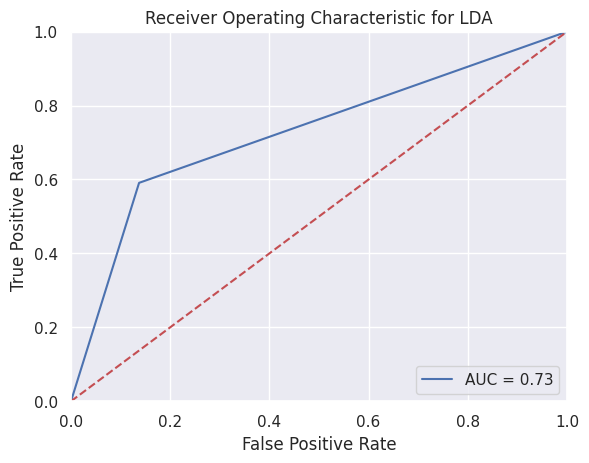

In [84]:
plt.title('Receiver Operating Characteristic for LDA')
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

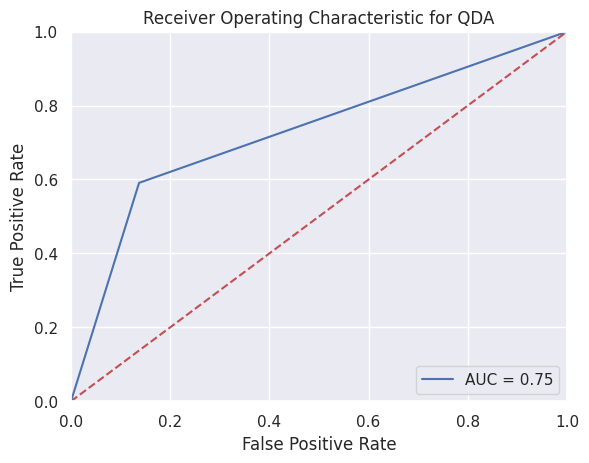

In [85]:
plt.title('Receiver Operating Characteristic for QDA')
roc_auc_qda = auc(fpr_qda, tpr_qda)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_qda)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Thus, we used LDA and QDA for classifying the Diabetes dataset with accuracy 0.73 and 0.75 for the test dataset.